In [1]:
# Importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
# from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from datetime import datetime

In [2]:
# Readind data files
tripdf1 = pd.read_csv('202004-divvy-tripdata.csv')
tripdf2 = pd.read_csv('202005-divvy-tripdata.csv')
tripdf3 = pd.read_csv('202006-divvy-tripdata.csv')
tripdf4 = pd.read_csv('202007-divvy-tripdata.csv')
tripdf5 = pd.read_csv('202008-divvy-tripdata.csv')
tripdf6 = pd.read_csv('202009-divvy-tripdata.csv')
tripdf7 = pd.read_csv('202010-divvy-tripdata.csv')
tripdf8 = pd.read_csv('202011-divvy-tripdata.csv')
tripdf9 = pd.read_csv('202012-divvy-tripdata.csv')
tripdf10 = pd.read_csv('202101-divvy-tripdata.csv')
tripdf11 = pd.read_csv('202102-divvy-tripdata.csv')
tripdf12 = pd.read_csv('202103-divvy-tripdata.csv')
tripdf13 = pd.read_csv('202104-divvy-tripdata.csv')
tripdf14 = pd.read_csv('202105-divvy-tripdata.csv')
tripdf15 = pd.read_csv('202106-divvy-tripdata.csv')
tripdf16 = pd.read_csv('202107-divvy-tripdata.csv')
tripdf17 = pd.read_csv('202108-divvy-tripdata.csv')
tripdf18 = pd.read_csv('202109-divvy-tripdata.csv')
tripdf19 = pd.read_csv('202110-divvy-tripdata.csv')
tripdf20 = pd.read_csv('202111-divvy-tripdata.csv')
tripdf21 = pd.read_csv('202112-divvy-tripdata.csv')
tripdf22 = pd.read_csv('202201-divvy-tripdata.csv')
tripdf23 = pd.read_csv('202202-divvy-tripdata.csv')

In [3]:
all_df = pd.concat([tripdf1, tripdf2, tripdf3, tripdf4, tripdf5,
                   tripdf6, tripdf7, tripdf8, tripdf9, tripdf10,
                   tripdf11, tripdf12, tripdf13, tripdf14, tripdf15,
                   tripdf16, tripdf17, tripdf18, tripdf19, tripdf20,
                   tripdf21, tripdf22, tripdf23])

In [4]:
ProfileReport(all_df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
all_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [6]:
# dropping duplicates from ride_id
all_df = all_df.drop_duplicates(subset='ride_id', keep='first')

In [7]:
all_df.shape

(8929029, 13)

([<matplotlib.patches.Wedge at 0x7fc152bd94e0>,
 [Text(-0.221973095924669, 1.077370848262388, 'member'),
  Text(0.22197299505392903, -1.0773708690450046, 'casual')],
 [Text(-0.12107623414072853, 0.5876568263249389, '56.5%'),
  Text(0.12107617912032491, -0.5876568376609116, '43.5%')])

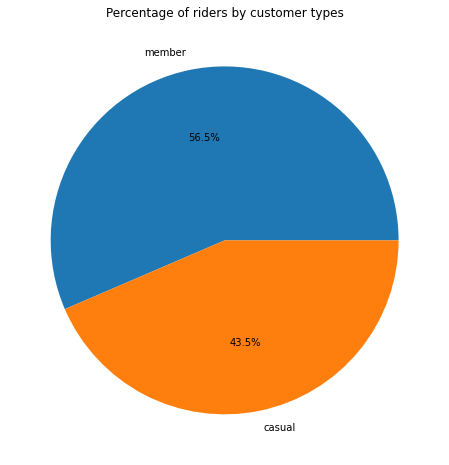

In [9]:
# plot member_casual
labels = 'member', 'casual'
plt.figure(figsize=(8,8))
plt.title("Percentage of riders by customer types")
plt.pie(all_df['member_casual'].value_counts(), labels = labels, autopct='%1.1f%%')

In [10]:
start_station = all_df['start_station_name'].value_counts()
end_station = all_df['end_station_name'].value_counts()
print("Top 10 start stations with most riders\n", start_station.head(10), "\n")
print("Top 10 end stations with most riders\n", end_station.head(10))

Top 10 start stations with most riders
 Streeter Dr & Grand Ave    116243
Clark St & Elm St           71852
Wells St & Concord Ln       67556
Theater on the Lake         65167
Millennium Park             65071
Michigan Ave & Oak St       64871
Wells St & Elm St           59643
Clark St & Armitage Ave     55472
Clark St & Lincoln Ave      54655
Dearborn St & Erie St       54518
Name: start_station_name, dtype: int64 

Top 10 end stations with most riders
 Streeter Dr & Grand Ave    119034
Clark St & Elm St           70929
Wells St & Concord Ln       68165
Millennium Park             66684
Theater on the Lake         66656
Michigan Ave & Oak St       65700
Wells St & Elm St           57965
Dearborn St & Erie St       55264
Broadway & Barry Ave        54809
Wabash Ave & Grand Ave      54569
Name: end_station_name, dtype: int64


<AxesSubplot:title={'center':'Rides by type of bicycle and by customer type'}, xlabel='rideable_type', ylabel='count'>

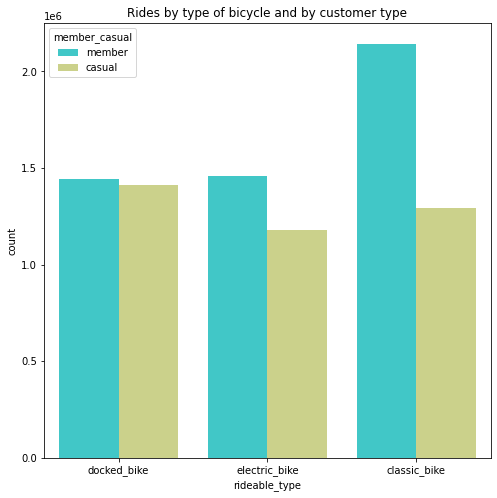

In [13]:
# Bikes used 
plt.figure(figsize=(8,8))
plt.title("Rides by type of bicycle and by customer type")
sns.countplot(x='rideable_type', data = all_df, palette = 'rainbow', hue = 'member_casual')

In [14]:
all_df['started_at'] = pd.to_datetime(all_df['started_at'])
all_df['ended_at'] = pd.to_datetime(all_df['ended_at'])
time_diff = all_df['ended_at'] - all_df['started_at']
time_in_minutes = time_diff / pd.Timedelta('60s')
avg = sum(time_in_minutes) / time_in_minutes.count()

In [15]:
all_df['timespent'] = time_in_minutes

In [16]:
from scipy import stats
z = np.abs(stats.zscore(all_df['timespent']))
all_df = all_df[(z <= 2)]

In [17]:
max(all_df['timespent'])

512.65

In [18]:
# all_df.to_csv('all_trips_data.csv', sep='\t')

In [19]:
# getting days based on rides
all_df['days_start'] = all_df['started_at'].dt.day_name()

In [21]:
all_df['days_start'].unique()

array(['Sunday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Thursday',
       'Monday'], dtype=object)

In [22]:
# getting months based on rides
all_df['month_start'] = all_df['started_at'].dt.month_name()

In [23]:
# getting hours riders start riding
all_df['hour_start'] = all_df['started_at'].dt.hour
# all_df.info()

In [24]:
# all_df['hour_start']

In [26]:
# creating a csv with the new created columns with riding day, month and hour
# all_df.to_csv('all_trips_data.csv', sep='\t')

In [27]:
# sns.lineplot(x='hour_start', data = all_df, palette = 'rainbow')

<AxesSubplot:title={'center':'Rides per day of week and by customer type'}, xlabel='days_start', ylabel='count'>

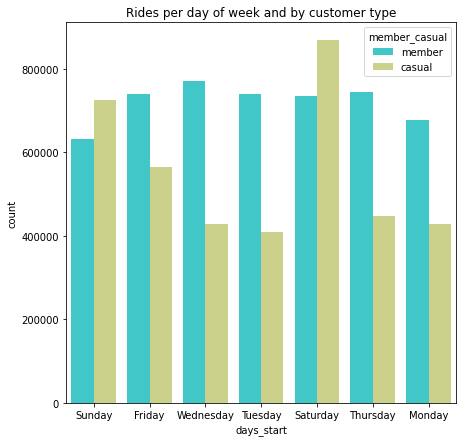

In [31]:
# Trends by day
plt.figure(figsize=(7,7))
plt.title("Rides per day of week and by customer type")
sns.countplot(x='days_start', data = all_df, palette = 'rainbow', hue = 'member_casual')

In [33]:
members = all_df[all_df['member_casual'] == 'member']
casual = all_df[all_df['member_casual'] == 'casual']

In [47]:
# Start stations used by customer type
station_m = members['start_station_name'].value_counts()
station_c = casual['start_station_name'].value_counts()
print("Top 5 start stations with most members\n", station_m.head(5), "\n")
print("Top 5 start stations with most casual riders\n", station_c.head(5))

Top 5 start stations with most members
 Clark St & Elm St           43858
Wells St & Concord Ln       38073
Kingsbury St & Kinzie St    37681
Wells St & Elm St           34224
Dearborn St & Erie St       33741
Name: start_station_name, dtype: int64 

Top 5 start stations with most casual riders
 Streeter Dr & Grand Ave      90927
Millennium Park              51431
Michigan Ave & Oak St        42529
Lake Shore Dr & Monroe St    37966
Theater on the Lake          35517
Name: start_station_name, dtype: int64


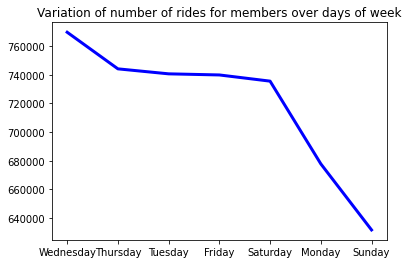

In [34]:
plt.title("Variation of number of rides for members over days of week")
plt.plot(members['days_start'].value_counts(), color = 'blue', linewidth = '3')
# plt.legend()

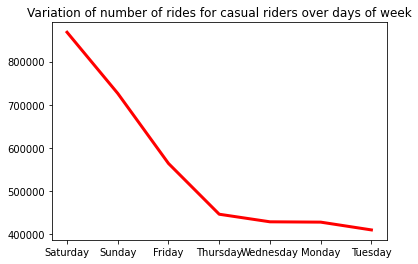

In [36]:
plt.title("Variation of number of rides for casual riders over days of week")
plt.plot(casual['days_start'].value_counts(), color = 'red', linewidth = '3')
# plt.figure(figsize=(10,7))
# sns.countplot(x='days_start', data = casual)

<AxesSubplot:title={'center':'Trends of starting hour by customer type'}, xlabel='hour_start', ylabel='count'>

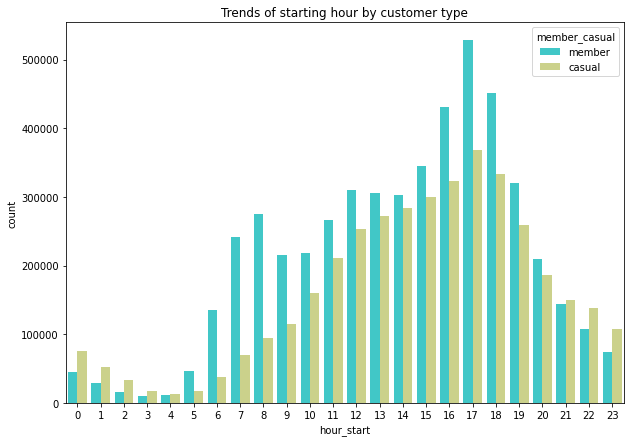

In [38]:
plt.figure(figsize = (10, 7))
plt.title("Trends of starting hour by customer type")
sns.countplot(x='hour_start', data = all_df, palette = 'rainbow', hue = 'member_casual')

<AxesSubplot:title={'center':'Trends of starting hour for casual riders'}, xlabel='hour_start', ylabel='count'>

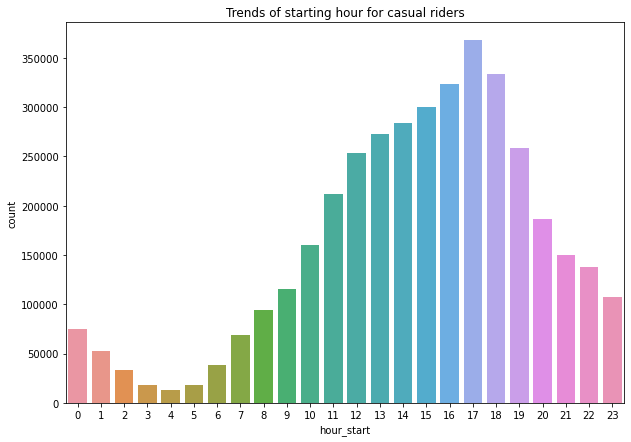

In [42]:
plt.figure(figsize = (10, 7))
plt.title("Trends of starting hour for casual riders")
sns.countplot(x='hour_start', data = casual)

<AxesSubplot:title={'center':'Trends of starting hour for Cyclic members'}, xlabel='hour_start', ylabel='count'>

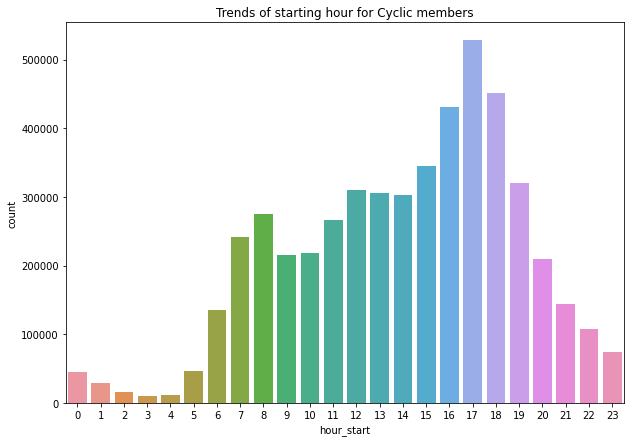

In [43]:
plt.figure(figsize = (10, 7))
plt.title("Trends of starting hour for Cyclic members")
sns.countplot(x='hour_start', data = members)

In [41]:
# plt.figure(figsize=(10,7))
# plt.title("Number of rides per days of week by customer type")
# sns.countplot(x='days_start', data = all_df, hue = 'member_casual')
# sns.countplot(x='month_start', data = all_df, palette = 'rainbow', hue = 'member_casual')

<AxesSubplot:title={'center':'Rides per month by customer type'}, xlabel='month_start', ylabel='count'>

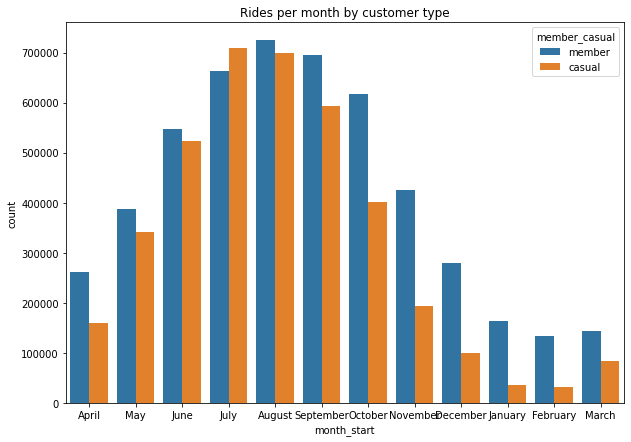

In [40]:
plt.figure(figsize=(10,7))
plt.title("Rides per month by customer type")
sns.countplot(x='month_start', data = all_df, hue = 'member_casual')

In [152]:
# avg time spent by members
avg_m = sum(members['timespent']) / members['timespent'].count()
avg_c = sum(casual['timespent']) / casual['timespent'].count()
avg_individual = sum(all_df['timespent']) / all_df['timespent'].count()

In [153]:
print("Average time spent by members during ride", avg_m)
print("Average time spent by casual riders during ride", avg_c)
print("Average time spent by an individual during ride", avg_individual)

Average time spent by members during ride 13.91918702089049
Average time spent by casual riders during ride 28.380491247594588
Average time spent by an individual during ride 20.20343936068323
